In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [38]:
data=pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [39]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


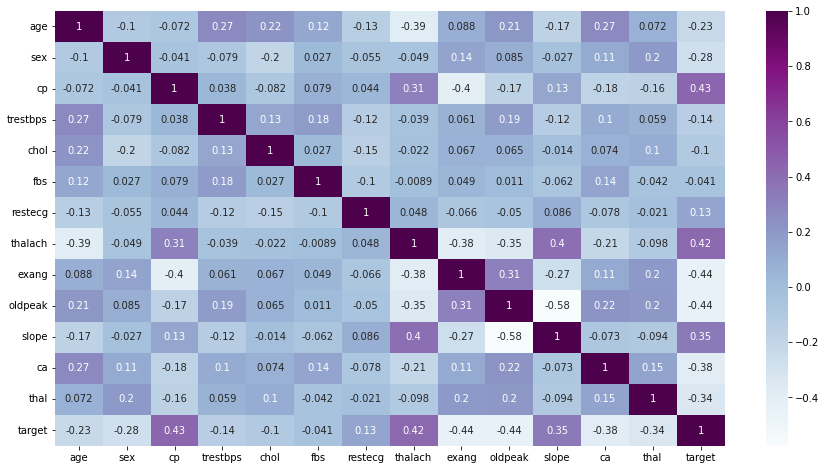

In [41]:
### Correlation information of variables
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="BuPu",);

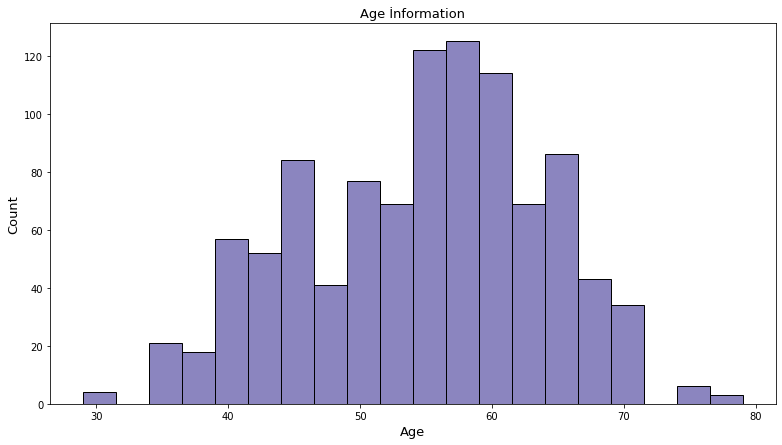

In [42]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="age",color="#645CAA",binwidth=2.5,element="bars");
plt.title("Age İnformation",size=13)
plt.xlabel("Age",size=13);
plt.ylabel("Count",size=13);

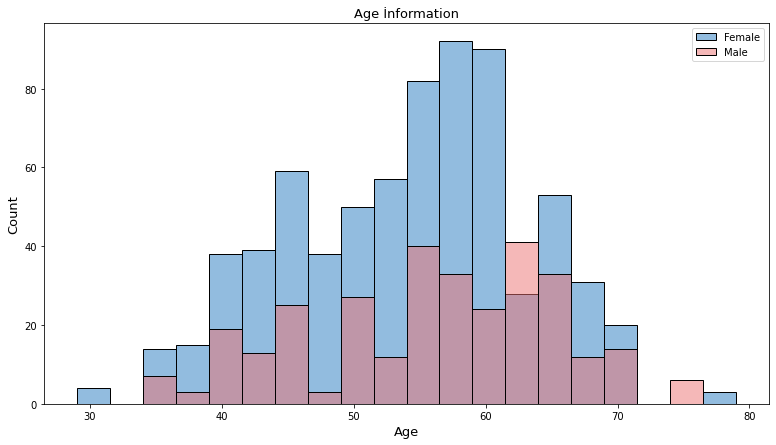

In [43]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="age",hue="sex",palette=sns.color_palette(["#EC7272","#277BC0"]),binwidth=2.5,element="bars");
plt.legend(["Female","Male"])
plt.title("Age İnformation",size=13)
plt.xlabel("Age",size=13);
plt.ylabel("Count",size=13);
plt.show()

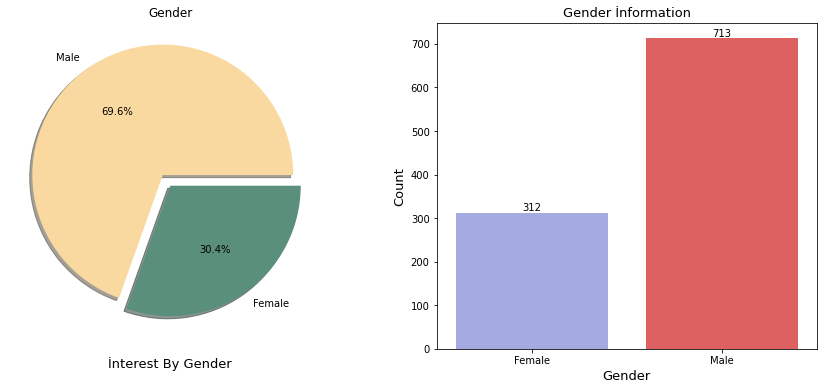

In [44]:
countgender=data[["sex"]].value_counts().reset_index(name="Count").replace({1:"Male",0:"Female"})
gender=countgender["sex"].tolist()
count=countgender["Count"].tolist()
#
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
explode=[0.1,0.0]
palette=sns.color_palette(["#FAD9A1","#5A8F7B"])
plt.pie(count,labels=gender,autopct="%1.1f%%",colors=palette,explode=explode,shadow=True)
plt.title("Gender")
plt.xlabel("İnterest By Gender",size=13)
#
plt.subplot(1,2,2)
ax=sns.countplot(data=data,x="sex",palette=sns.color_palette(["#9BA3EB","#F24C4C"]));
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1],["Female","Male"]);
plt.title("Gender İnformation",size=13)
plt.xlabel("Gender",size=13);
plt.ylabel("Count",size=13);
plt.show()

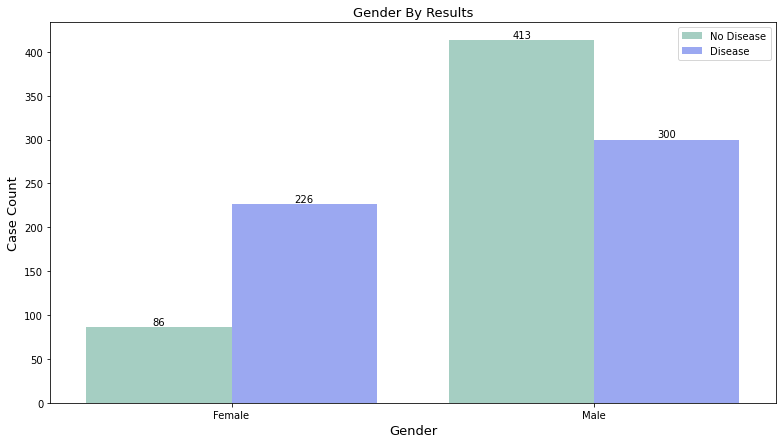

In [45]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="sex",hue="target",palette=sns.color_palette(["#9ED5C5","#8D9EFF"]))
for i in ax.containers:
    ax.bar_label(i)
plt.legend(["No Disease","Disease"])
plt.xticks([0,1],["Female","Male"])
plt.title("Gender By Results",size=13)
plt.xlabel("Gender",size=13)
plt.ylabel("Case Count",size=13)
plt.show()

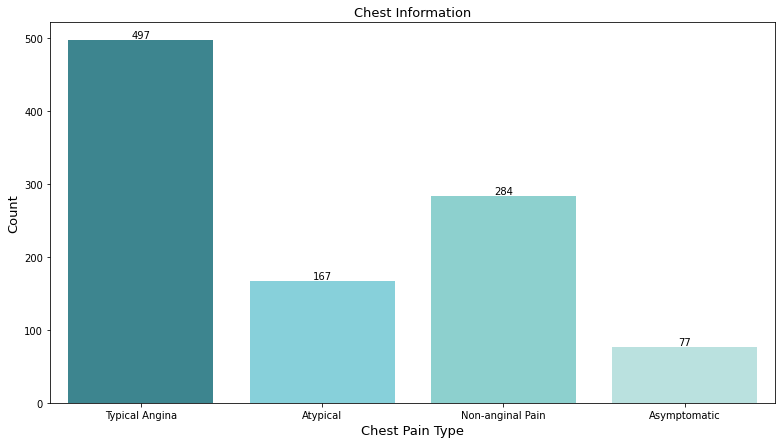

In [46]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="cp",palette=sns.color_palette(["#2F8F9D","#79DAE8","#82DBD8","#B3E8E5"]))
plt.xticks([0,1,2,3],["Typical Angina","Atypical","Non-anginal Pain","Asymptomatic"],size=10)
plt.title("Chest Information",size=13)
plt.xlabel("Chest Pain Type",size=13)
plt.ylabel("Count",size=13)
for i in ax.containers:
    ax.bar_label(i)

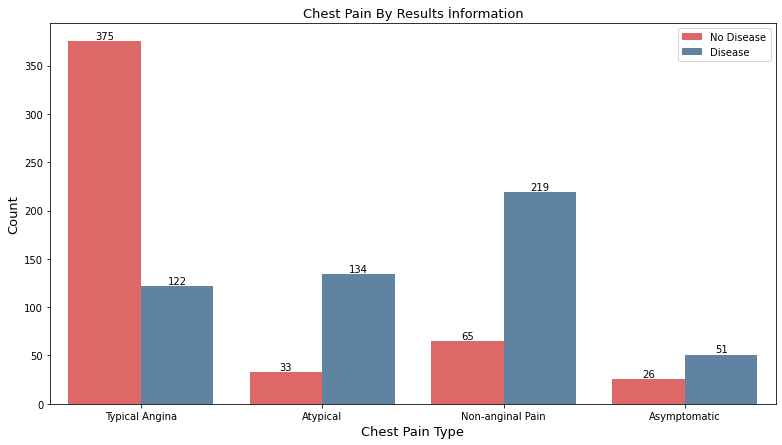

In [47]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="cp",hue="target",palette=sns.color_palette(["#F05454","#5584AC"]))
plt.legend(["No Disease","Disease"])
plt.xticks([0,1,2,3],["Typical Angina","Atypical","Non-anginal Pain","Asymptomatic"],size=10)
plt.title("Chest Pain By Results İnformation",size=13)
plt.xlabel("Chest Pain Type",size=13)
plt.ylabel("Count",size=13)
for i in ax.containers:
    ax.bar_label(i)

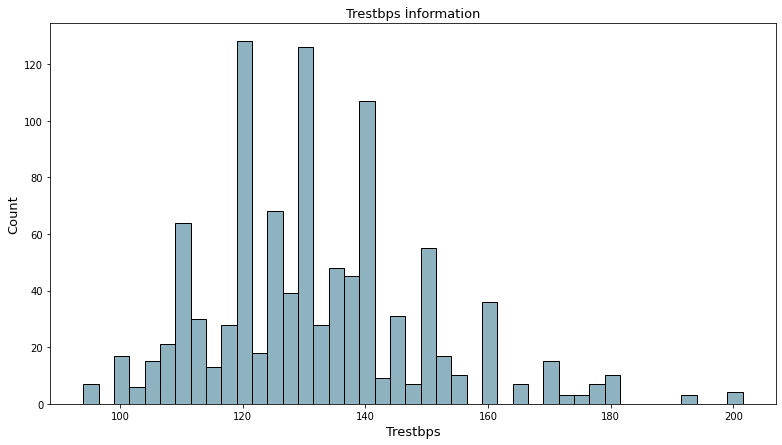

In [48]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="trestbps",color="#6998AB",binwidth=2.5,element="bars");
plt.title("Trestbps İnformation",size=13)
plt.xlabel("Trestbps",size=13);
plt.ylabel("Count",size=13);


In [49]:
cat_data=["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]
value_data=["age","trestbps","chol","thalach","oldpeak"]

In [50]:
cat_data.remove("sex")
cat_data.remove("target")
data=pd.get_dummies(data,columns=data[cat_data].columns,drop_first=True)
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,60,1,125,258,141,2.8,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,47,1,110,275,118,1.0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,50,0,110,254,159,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[value_data]=sc.fit_transform(data[value_data])
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0.821321,-0.060888,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.158157,1,0.479107,-0.833861,0.255968,1.727137,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.716595,1,0.764688,-1.396233,-1.048692,1.301417,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.724079,1,0.936037,-0.833861,0.516900,-0.912329,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.834359,0,0.364875,0.930822,-1.874977,0.705408,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.479107,-0.484803,0.647366,-0.912329,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,0.613800,1,-0.377636,0.232705,-0.352873,1.471705,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,-0.819834,1,-1.234378,0.562371,-1.353113,-0.060888,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,-0.488996,0,-1.234378,0.155137,0.429923,-0.912329,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [52]:
X=data.drop("target",axis=1)
y=data["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [53]:
def accuracy_(y,predict):
    accuracy=accuracy_score(y,predict)
    return accuracy

In [54]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model=RandomForestClassifier().fit(X_train,y_train)
pred=randomforest_model.predict(X_test)
randomforest_aucscore=accuracy_(y_test,pred)
randomforest_aucscore

0.9883268482490273

In [75]:
X_test.values[[4]]

array([[-0.70955482,  1.        , -0.09205458,  0.1939212 ,  0.03852459,
        -0.91232909,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ]])

In [76]:
pred=randomforest_model.predict([[-0.70955482,  1.        , -0.09205458,  0.1939212 ,  0.03852459,
        -0.91232909,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ]])
pred[0]

C:\Users\prath\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

In [74]:
y_test.values[[4]]

array([0], dtype=int64)